# Telecom Dataset 

Understand the Telecom data provided by analysing and visualising the data.Build the model using Logistic Regression with the train data. Predict the customers churning for the test data provided based on the built and validate

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_excel('train_telecom.xlsx')

### Data Exploration

In [3]:
df.shape

(3333, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

In [5]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
def rstr(df): return df.apply(lambda x: [x.unique()])
rstr(df)

state                            [[KS, OH, NJ, OK, AL, MA, MO, LA, WV, IN, RI, ...
account_length                   [[128, 107, 137, 84, 75, 118, 121, 147, 117, 1...
area_code                          [[area_code_415, area_code_408, area_code_510]]
international_plan                                                     [[no, yes]]
voice_mail_plan                                                        [[yes, no]]
number_vmail_messages            [[25, 26, 0, 24, 37, 27, 33, 39, 30, 41, 28, 3...
total_day_minutes                [[265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 21...
total_day_calls                  [[110, 123, 114, 71, 113, 98, 88, 79, 97, 84, ...
total_day_charge                 [[45.07, 27.47, 41.38, 50.9, 28.34, 37.98, 37....
total_eve_minutes                [[197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 348...
total_eve_calls                  [[99, 103, 110, 88, 122, 101, 108, 94, 80, 111...
total_eve_charge                 [[16.78, 16.62, 10.3, 5.26, 12.61, 18.75, 29.6...
tota

In [7]:
df.shape

(3333, 20)

In [8]:
df_temp=pd.pivot_table(df,index=['state'],columns='churn',values='account_length',margins=True,aggfunc='count')
df_temp['Percent']=round(df_temp[df_temp.columns[1]]/df_temp[df_temp.columns[2]],2)*100
df_temp.sort_values('Percent',ascending=False).head(10)

churn,no,yes,All,Percent
state,,,,
NJ,50,18,68,26.0
CA,25,9,34,26.0
TX,54,18,72,25.0
MD,53,17,70,24.0
SC,46,14,60,23.0
MI,57,16,73,22.0
MS,51,14,65,22.0
WA,52,14,66,21.0
ME,49,13,62,21.0


In [9]:
df_temp=pd.pivot_table(df,index=['area_code'],columns='churn',values='state',margins=True,aggfunc='count')
df_temp['Percent']=round(df_temp[df_temp.columns[1]]/df_temp[df_temp.columns[2]],2)*100
df_temp.sort_values('Percent',ascending=False)

churn,no,yes,All,Percent
area_code,,,,
area_code_408,716,122,838,15.0
area_code_510,715,125,840,15.0
area_code_415,1419,236,1655,14.0
All,2850,483,3333,14.0


In [10]:
df_temp=pd.pivot_table(df,index=['international_plan'],columns='churn',values='state',margins=True,aggfunc='count')
df_temp['Percent']=round(df_temp[df_temp.columns[1]]/df_temp[df_temp.columns[2]],2)*100
df_temp

churn,no,yes,All,Percent
international_plan,,,,
no,2664,346,3010,11.0
yes,186,137,323,42.0
All,2850,483,3333,14.0


In [11]:
df_temp=pd.pivot_table(df,index=['voice_mail_plan'],columns='churn',values='state',margins=True,aggfunc='count')
df_temp['Percent']=round(df_temp[df_temp.columns[1]]/df_temp[df_temp.columns[2]],2)*100
df_temp

churn,no,yes,All,Percent
voice_mail_plan,,,,
no,2008,403,2411,17.0
yes,842,80,922,9.0
All,2850,483,3333,14.0


In [12]:
df_temp=pd.pivot_table(df,index=['number_customer_service_calls'],columns='churn',values='state',margins=True,aggfunc='count')
df_temp['Percent']=round(df_temp[df_temp.columns[1]]/df_temp[df_temp.columns[2]],2)*100
df_temp

churn,no,yes,All,Percent
number_customer_service_calls,,,,
0,605.0,92.0,697,13.0
1,1059.0,122.0,1181,10.0
2,672.0,87.0,759,11.0
3,385.0,44.0,429,10.0
4,90.0,76.0,166,46.0
5,26.0,40.0,66,61.0
6,8.0,14.0,22,64.0
7,4.0,5.0,9,56.0
8,1.0,1.0,2,50.0


In [13]:
df_temp=pd.pivot_table(df,index=['number_customer_service_calls'],columns='churn',values='state',margins=True,aggfunc='count')
df_temp['Percent']=round(df_temp[df_temp.columns[1]]/df_temp[df_temp.columns[2]],2)*100
df_temp.sort_values('Percent',ascending=False)

churn,no,yes,All,Percent
number_customer_service_calls,,,,
9,NaN,2.0,2,100.0
6,8.0,14.0,22,64.0
5,26.0,40.0,66,61.0
7,4.0,5.0,9,56.0
8,1.0,1.0,2,50.0
4,90.0,76.0,166,46.0
All,2850.0,483.0,3333,14.0
0,605.0,92.0,697,13.0
2,672.0,87.0,759,11.0


In [14]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


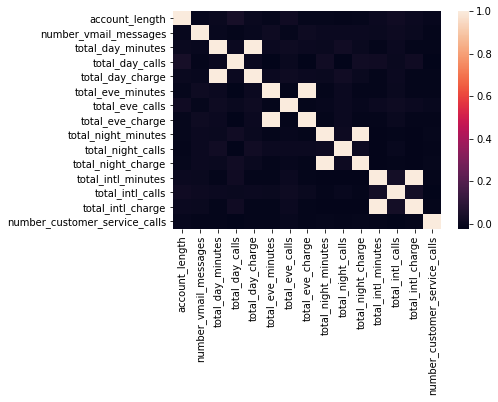

In [15]:
corr =df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

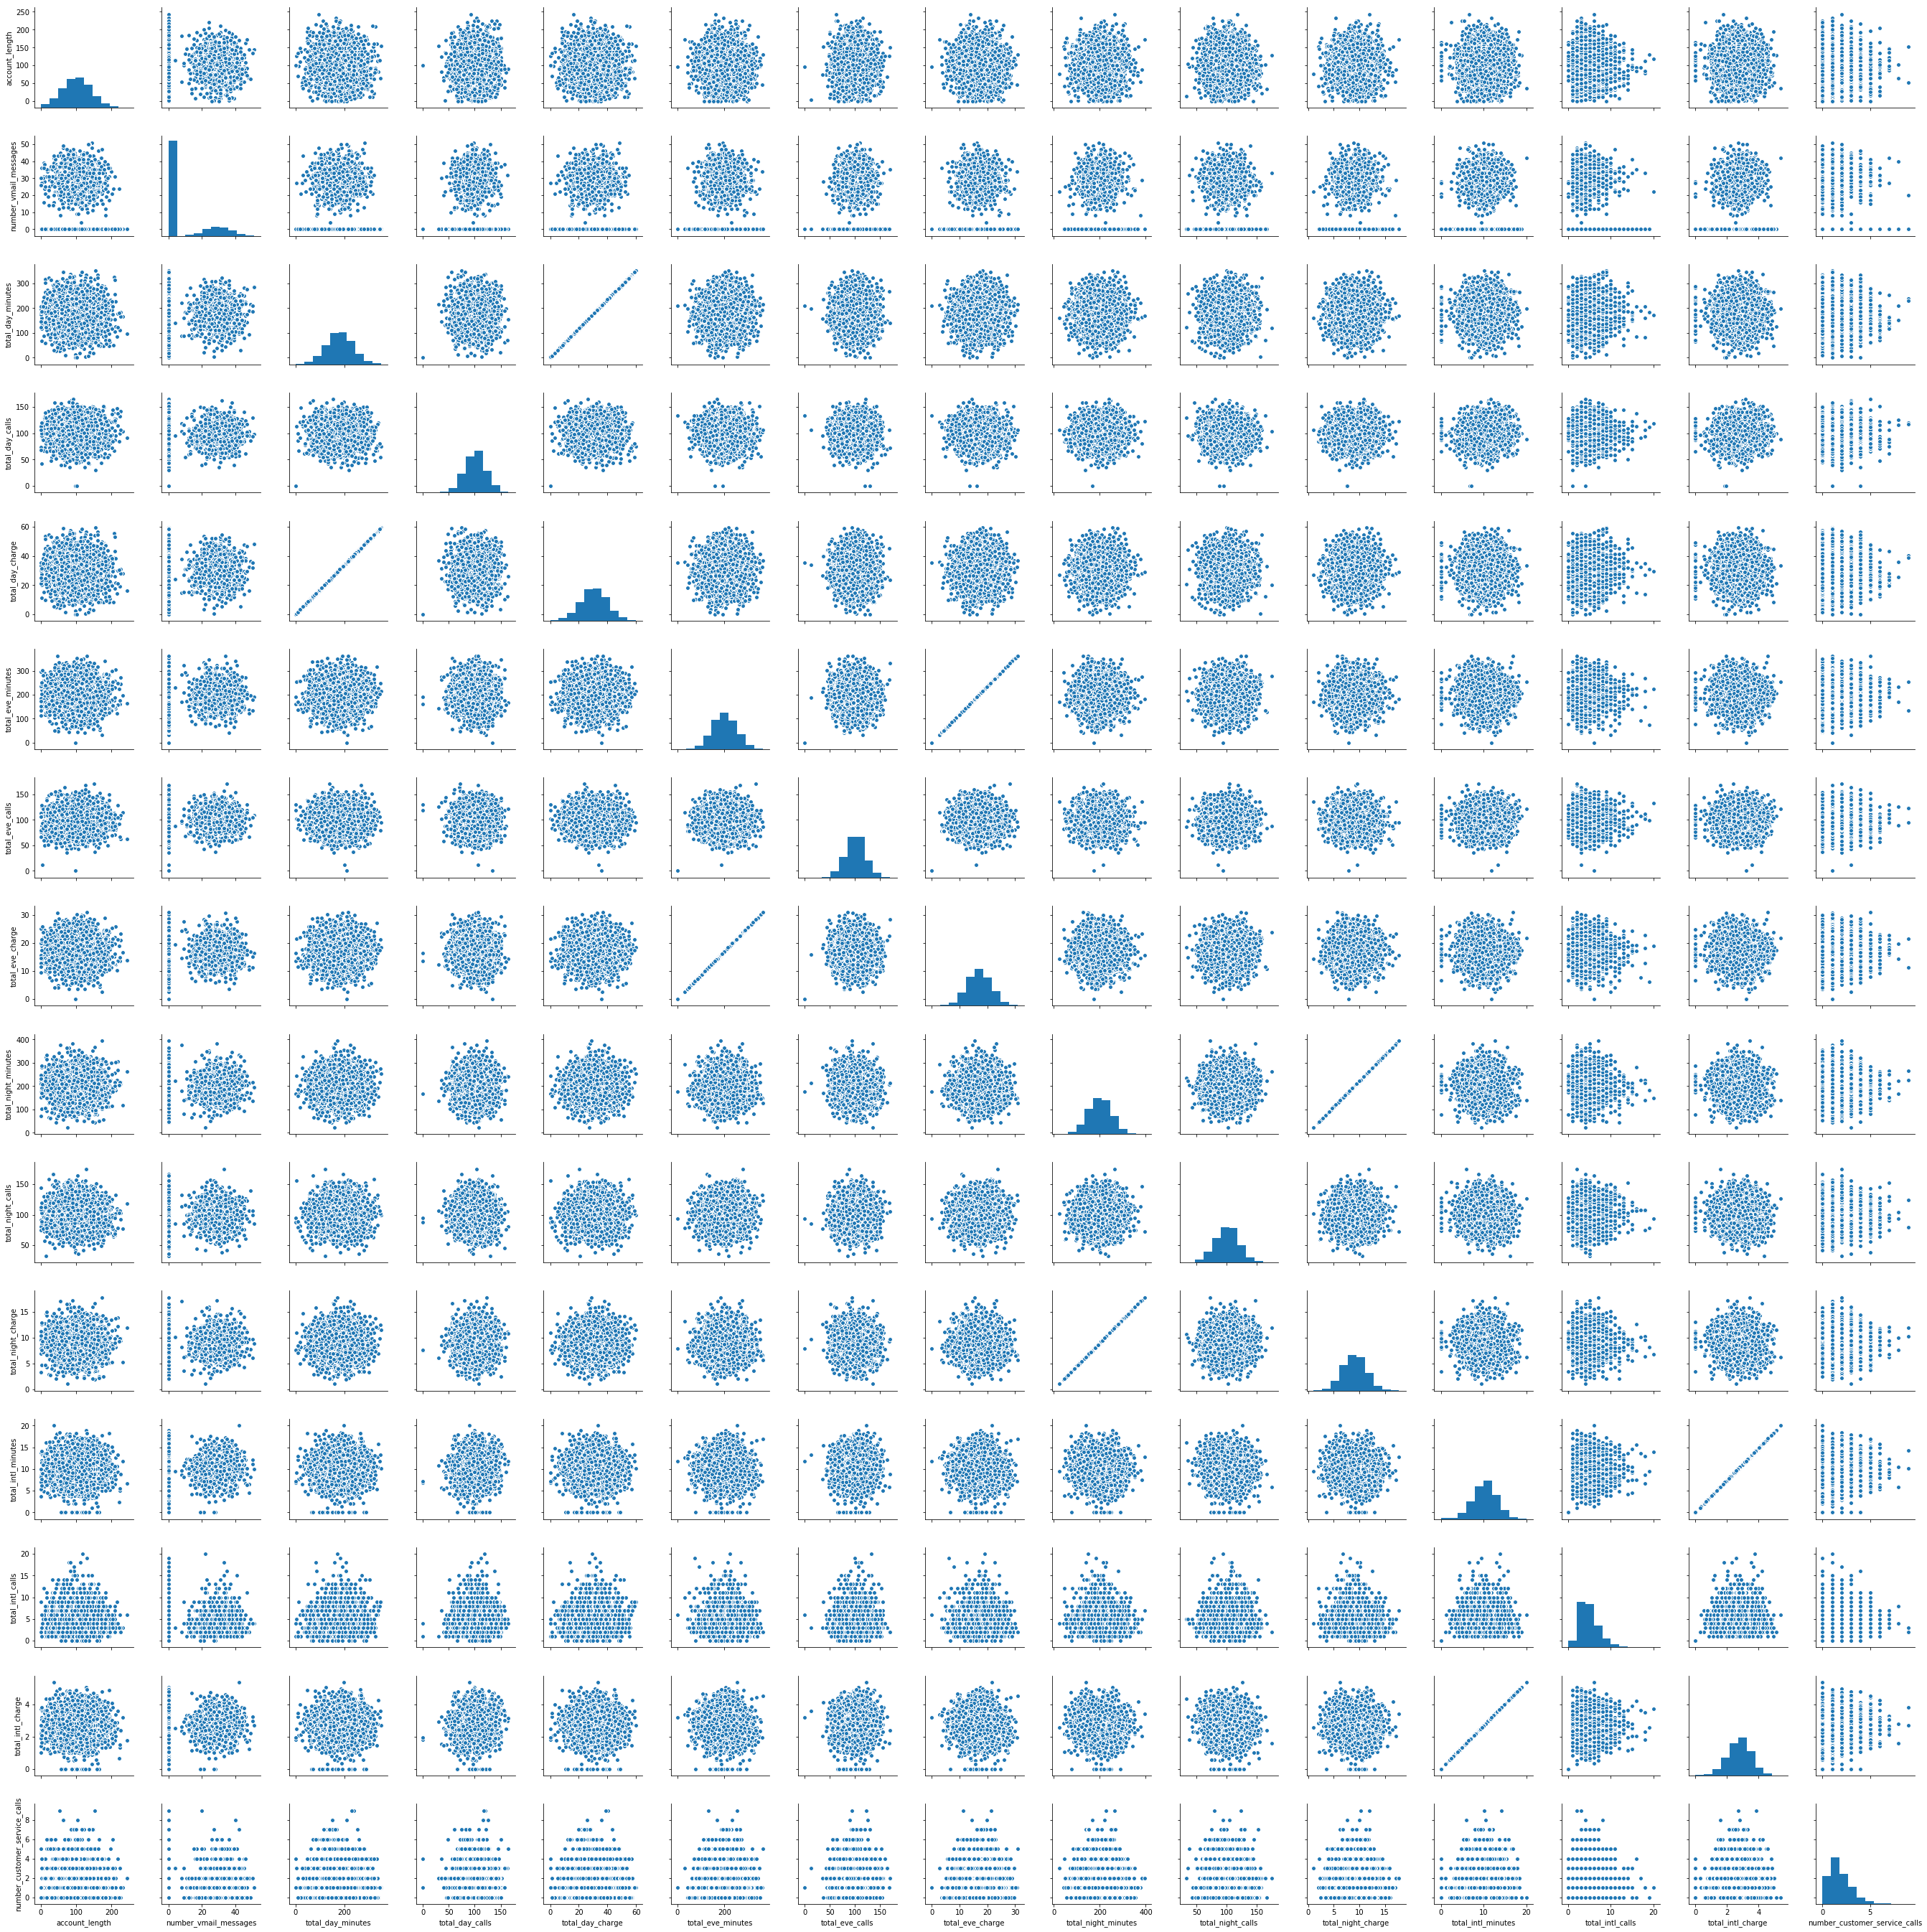

In [16]:
sns.pairplot(df)

# Model Preparation

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

In [18]:
def encode_df(df):
    df_encoded=pd.get_dummies(df, columns=["state", "area_code","international_plan","voice_mail_plan","churn"])
    df_encoded=df_encoded.drop(['international_plan_no','voice_mail_plan_no','churn_no'],axis=1)
    return (df_encoded)

In [20]:
df_encoded=encode_df(df)
y=df_encoded['churn_yes']
x=df_encoded.drop('churn_yes',axis=1)

In [29]:
def testmodel(x,y):
    x_split,x_test,y_split,y_test = train_test_split(x,y,test_size = 0.3,random_state=26)
    x_train,x_valid,y_train,y_valid = train_test_split(x_split,y_split,test_size = 0.3,random_state=26)
    
    eqn=linear_model.LogisticRegression()
    eqn.fit(x_train,y_train)
    y_pred = eqn.predict(x_valid)
    confuse = confusion_matrix(y_valid,y_pred) 
    accuracy = round((confuse[0][0] + confuse[1][1])/ len(y_valid),4)
    precision =  round(confuse[1][1]/(confuse[1][1]+confuse[0][1]),4)
    recall = round(confuse[1][1]/(confuse[1][1]+confuse[1][0]),4)
    print("***Training Data***")
    print("accuracy :",accuracy)
    print("precision :",precision)
    print("recall :",recall)
    print()
    print()
    
    y_pred = eqn.predict(x_test)
    confuse = confusion_matrix(y_test,y_pred)
    accuracy = round((confuse[0][0] + confuse[1][1])/ len(y_test),4)
    precision =  round(confuse[1][1]/(confuse[1][1]+confuse[0][1]),4)
    recall = round(confuse[1][1]/(confuse[1][1]+confuse[1][0]),4)
    print("***Validation Data***")
    print("accuracy :",accuracy)
    print("precision :",precision)
    print("recall :",recall)
    return eqn  

In [48]:
model=testmodel(x,y)

***Training Data***
accuracy : 0.86
precision : 0.5
recall : 0.2449


***Validation Data***
accuracy : 0.8623
precision : 0.4545
recall : 0.1493


In [31]:
df_encoded.columns
x=df_encoded[['number_customer_service_calls','international_plan_yes','voice_mail_plan_yes','total_day_charge','total_intl_charge']]
y=df_encoded['churn_yes']
model=testmodel(x,y)
# x=["No_CS_Calls","International_Plan","Voice_Mail_Plan","Total_Day_charge","Total_Eve_Charge","Total_Intl_Charge"]

***Training Data***
accuracy : 0.8686
precision : 0.6154
recall : 0.1633


***Validation Data***
accuracy : 0.8663
precision : 0.5
recall : 0.1045


In [43]:
x=df_encoded[['number_customer_service_calls','international_plan_yes','voice_mail_plan_yes','total_day_charge','total_night_charge','total_eve_charge','total_intl_charge']]
y=df_encoded['churn_yes']
model=testmodel(x,y)

***Training Data***
accuracy : 0.8686
precision : 0.6154
recall : 0.1633


***Validation Data***
accuracy : 0.8683
precision : 0.5385
recall : 0.1045


### So this appears to be the best model, Lets now test this with our test data.

In [49]:
df=pd.read_excel('test_telecom.xlsx')
df_encoded=encode_df(df)
# x=df_encoded[['number_customer_service_calls','international_plan_yes','voice_mail_plan_yes','total_day_charge','total_night_charge','total_eve_charge','total_intl_charge']]
x=df_encoded.drop('churn_yes',axis=1)
y=df_encoded['churn_yes']

y_pred = model.predict(x)
confuse = confusion_matrix(y,y_pred)

accuracy = round((confuse[0][0] + confuse[1][1])/ len(y),4)
precision =  round(confuse[1][1]/(confuse[1][1]+confuse[0][1]),4)
recall = round(confuse[1][1]/(confuse[1][1]+confuse[1][0]),4)
print("***Test Data***")
print("accuracy :",accuracy)
print("precision :",precision)
print("recall :",recall)


***Test Data***
accuracy : 0.8758
precision : 0.6
recall : 0.2277
